# **Confusion_Matrix**

# Index

1. Simple Confusion Matrix

   1.1 Visualization using Seaborn

   1.2 Visualization Implementation

2. Multi-class Confusion Matrix

  2.1 Seaborn을 이용한 시각화



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd/content/drive/MyDrive/Colab/study/metacode/creditcard/

/content/drive/MyDrive/Colab/study/metacode/creditcard


In [ ]:
# Basic setting
import numpy as np
import matplotlib.pyplot as plt
import itertools

In [ ]:
# Check tensorflow version
print(f"TensorFlow Version: {tf.__version__}")

TensorFlow Version: 2.17.0


# [1] **Simple Confusion Matrix**



In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [ ]:
y_actual = [1, 0, 0, 1, 0, 0, 1, 0, 0, 1]
y_pred = [1, 1, 0, 1, 1, 0, 1, 1, 0, 0]

In [ ]:
CM = confusion_matrix(y_actual, y_pred)
print('Confusion Matrix = \n', CM)

Confusion Matrix = 
 [[3 3]
 [1 3]]


In [ ]:
# precision, recall, f1-score
print('Accuracy = ', accuracy_score(y_actual, y_pred))
print('Report = \n', classification_report(y_actual, y_pred))

Accuracy =  0.6
Report = 
               precision    recall  f1-score   support

           0       0.75      0.50      0.60         6
           1       0.50      0.75      0.60         4

    accuracy                           0.60        10
   macro avg       0.62      0.62      0.60        10
weighted avg       0.65      0.60      0.60        10



### [1.1] **Visualization** using <font color=red>Seaborn</font>

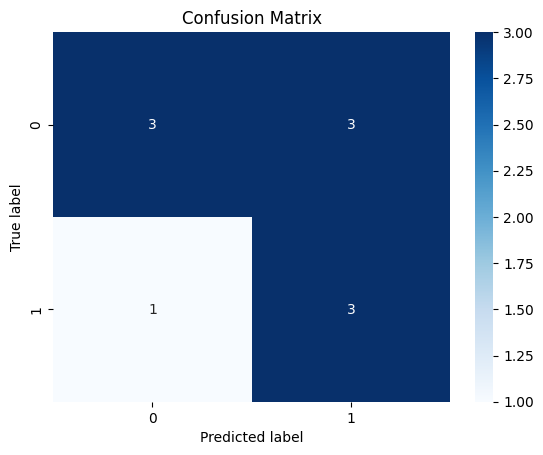

In [ ]:
# Visualization
import seaborn as sns
sns.heatmap(CM, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()

### [1.2] **Visualization** Implementation

In [ ]:
def plot_confusion_matrix(cm,
                          classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting `normalize=True`.
  """
  if normalize:
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    print("Normalized confusion matrix")
  else:
    print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()

Confusion matrix, without normalization
[[3 3]
 [1 3]]


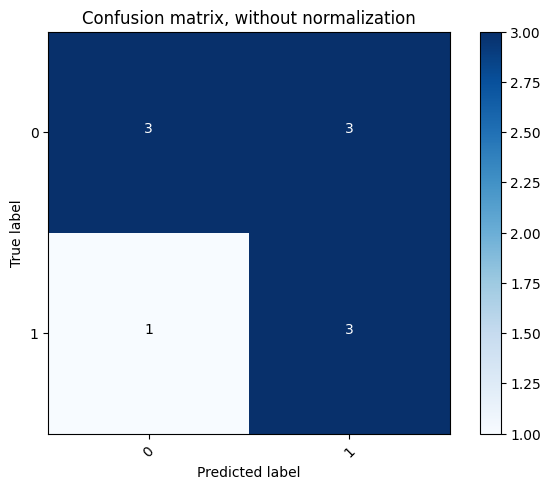

In [ ]:
cnf_matrix = confusion_matrix(y_actual, y_pred, labels=[0, 1])
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=[0, 1], normalize=False, title='Confusion matrix, without normalization')


# [2] **Multi-class Confusion Matrix**

In [ ]:
classes = ['A', 'B', 'C']
y_actual = ['A', 'B', 'C', 'A', 'B', 'C', 'A', 'B', 'C', 'A']
y_pred = ['A', 'B', 'C', 'A', 'B', 'C', 'A', 'B', 'C', 'A']

In [ ]:
CM = confusion_matrix(y_actual, y_pred)
print('Confusion Matrix = \n', CM)

Confusion Matrix = 
 [[4 0 0]
 [0 3 0]
 [0 0 3]]


In [ ]:
# precision, recall, f1-score
print('Accuracy = ', accuracy_score(y_actual, y_pred))
print('Report = \n', classification_report(y_actual, y_pred))

Accuracy =  1.0
Report = 
               precision    recall  f1-score   support

           A       1.00      1.00      1.00         4
           B       1.00      1.00      1.00         3
           C       1.00      1.00      1.00         3

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10



### [2-1] <font color=red>Seaborn</font>을 이용한 **시각화**

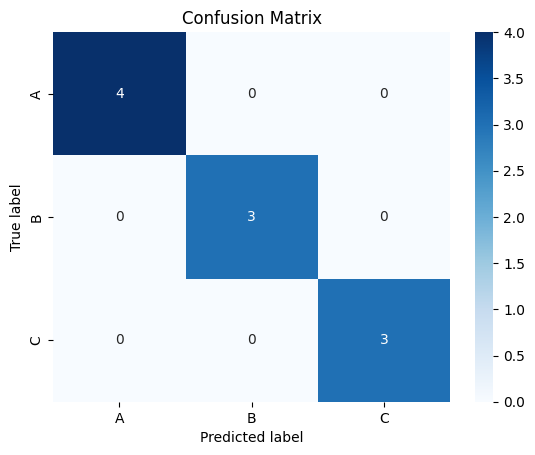

In [ ]:
# Visualization
import seaborn as sns
sns.heatmap(CM, annot=True, fmt='g', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()